### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第8天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/03/04
### 改版日期:  
### 改版備註:

# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [44]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [45]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


### ANS:

In [47]:
#先顯示部份資料
import pprint
pprint.pprint(app_train.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64
'---------------------'
column AMT_CREDIT avg is 599025.9997057016，std is 402490.776995946


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022920888>]],
      dtype=object)

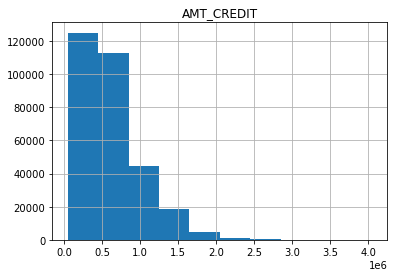

In [48]:
#設定欄位為AMT_CREDIT
#針對計算平均數及標準差
name = 'AMT_CREDIT'
pprint.pprint(app_train[name])
pprint.pprint('---------------------')
print('column {0} avg is {1}，std is {2}'.format(name,app_train[name].mean(),app_train[name].std()))
#畫出直方圖
app_train.hist(column=name)

In [49]:
#找出欄位定義
pprint.pprint(app_train.columns)
pprint.pprint('---------------------')
#顯示各種欄位種類
pprint.pprint(app_train.dtypes.value_counts())

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
'---------------------'
float64    65
int64      41
object     16
dtype: int64


In [50]:
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

41 Integer Features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

65 Float Features : ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OW

In [51]:
#針對int64計算平均數及標準差
for name in int_features:
     print('column {0} avg is {1}，std is {2}'.format(name,app_train[name].mean(),app_train[name].std()))

column SK_ID_CURR avg is 278180.51857657125，std is 102790.17534842374
column TARGET avg is 0.08072881945686496，std is 0.272418645647685
column CNT_CHILDREN avg is 0.4170517477423572，std is 0.7221213844389559
column DAYS_BIRTH avg is -16036.995066843137，std is 4363.988631785526
column DAYS_EMPLOYED avg is 63815.04590404896，std is 141275.7665186621
column DAYS_ID_PUBLISH avg is -2994.2023732484367，std is 1509.450419003031
column FLAG_MOBIL avg is 0.9999967480838083，std is 0.0018033070153584427
column FLAG_EMP_PHONE avg is 0.8198893698111612，std is 0.38428019893910226
column FLAG_WORK_PHONE avg is 0.1993684778755882，std is 0.399526228149481
column FLAG_CONT_MOBILE avg is 0.9981334001060125，std is 0.04316389414260104
column FLAG_PHONE avg is 0.28106636835755466，std is 0.44952054685618487
column FLAG_EMAIL avg is 0.0567199222141647，std is 0.23130703972354083
column REGION_RATING_CLIENT avg is 2.0524631639193394，std is 0.5090339028159309
column REGION_RATING_CLIENT_W_CITY avg is 2.0315208236

In [52]:
#針對float64計算平均數及標準差
for name in float_features:
     print('column {0} avg is {1}，std is {2}'.format(name,app_train[name].mean(),app_train[name].std()))

column AMT_INCOME_TOTAL avg is 168797.9192969845，std is 237123.14627883647
column AMT_CREDIT avg is 599025.9997057016，std is 402490.776995946
column AMT_ANNUITY avg is 27108.573909183444，std is 14493.737315117392
column AMT_GOODS_PRICE avg is 538396.2074288895，std is 369446.4605400129
column REGION_POPULATION_RELATIVE avg is 0.02086811205778947，std is 0.013831280122699869
column DAYS_REGISTRATION avg is -4986.120327538419，std is 3522.88632096305
column OWN_CAR_AGE avg is 12.061090818687727，std is 11.944811582242346
column CNT_FAM_MEMBERS avg is 2.152665450442101，std is 0.9106815691773334
column EXT_SOURCE_1 avg is 0.5021298056566621，std is 0.21106224927392553
column EXT_SOURCE_2 avg is 0.5143926741308463，std is 0.1910601549849387
column EXT_SOURCE_3 avg is 0.5108529061800121，std is 0.19484436446376072
column APARTMENTS_AVG avg is 0.11744049917466033，std is 0.10824029130030667
column BASEMENTAREA_AVG avg is 0.08844221905180052，std is 0.08243815873569478
column YEARS_BEGINEXPLUATATION_AV

#### 參考網址
https://stackoverflow.com/questions/42496508/histogram-on-pandas-column/42497430
https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/
https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html